In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [12]:
data1=loadmat('data1.mat')
# std = StandardScaler()
# data1_std = std.fit_transform(data1)
X = data1['X']
# print(X)
Y = data1['y']
# print(Y)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=1)
# print(x_train)
# print(y_train)

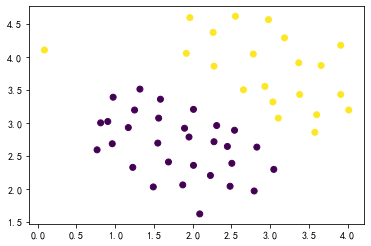

In [13]:
# 可视化数据集
plt.scatter(X[:,0],X[:,1],c=Y.flatten())


SVM model: Y = w0 + w1*x1 + w2*x2
截距: w0=[-15.37941975]
系数: w1=[[2.05629345 3.25491756]]
分类准确度：0.9375


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0.5, 1.0, '线性SVM')

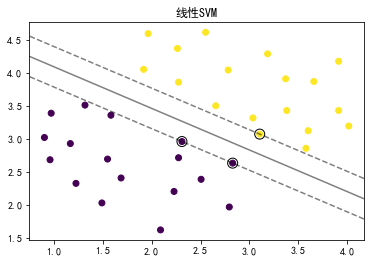

In [18]:
# skl_SVM_v1a.py
# Demo of linear SVM by scikit-learn
# v1.0a: 线性可分支持向量机模型（SciKitLearn）
# Copyright 2021 YouCans, XUPT
# Crated：2021-05-15
modelSVM = SVC(kernel='linear', C=100)  # SVC 建模：使用 SVC类，线性核函数
# modelSVM = LinearSVC(C=100)  # SVC 建模：使用 LinearSVC类，运行结果同上
modelSVM.fit(x_train, y_train)  # 用样本集 X,y 训练 SVM 模型

print("\nSVM model: Y = w0 + w1*x1 + w2*x2") # 分类超平面模型
print('截距: w0={}'.format(modelSVM.intercept_))  # w0: 截距, YouCans
print('系数: w1={}'.format(modelSVM.coef_))  # w1,w2: 系数, XUPT
print('分类准确度：{:.4f}'.format(modelSVM.score(x_test, y_test)))  # 对训练集的分类准确度

# 绘制分割超平面和样本集分类结果
plt.scatter(x_train[:,0], x_train[:,1], c=y_train.flatten())  # 散点图，根据 y值设置不同颜色
ax = plt.gca()  # 移动坐标轴
xlim = ax.get_xlim()  # 获得Axes的 x坐标范围
ylim = ax.get_ylim()  # 获得Axes的 y坐标范围
xx = np.linspace(xlim[0], xlim[1], 30)  # 创建等差数列，从 start 到 stop，共 num 个
yy = np.linspace(ylim[0], ylim[1], 30)  #
YY, XX = np.meshgrid(yy, xx)  # 生成网格点坐标矩阵 XUPT
xy = np.vstack([XX.ravel(), YY.ravel()]).T  # 将网格矩阵展平后重构为数组
Z = modelSVM.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])  # 绘制决策边界和分隔
ax.scatter(modelSVM.support_vectors_[:, 0], modelSVM.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')  # 绘制 支持向量
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title("线性SVM")


In [28]:
#数据处理
data2=loadmat('data2.mat')
X = data2['X']
# print(X)
Y = data2['y']
# print(Y)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=1)
# print(x_train)
# print(y_train)

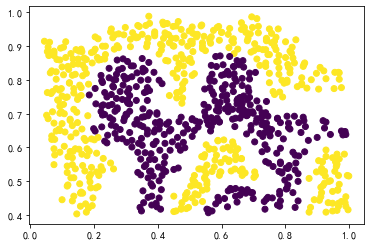

In [29]:
plt.scatter(X[:,0],X[:,1],c=Y.flatten())

分类准确度：0.9459


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


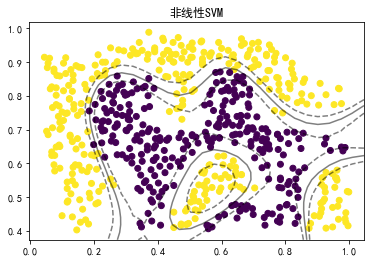

In [32]:
mymodel = SVC(C=100, kernel='rbf')  # SVC 建模
mymodel.fit(x_train, y_train)  # 用训练集 训练 SVM 模型
print('分类准确度：{:.4f}'.format(mymodel.score(x_test, y_test)))  # 对训练集的分类准确度

# 绘制图像 制作网格
# 散点图，根据y值设置不同颜色
plt.scatter(x_train[:,0], x_train[:,1], c=y_train.flatten())
ax = plt.gca()# 获得子图
# 获取横纵坐标最大值
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#在最大值与最小值之间形成30个规律的数据
xx = np.linspace(xlim[0], xlim[1], 30) 
yy = np.linspace(ylim[0], ylim[1], 30)
#使用这里形成的二维数组作为我们contour函数中的X和Y
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y .shape * x.shape这么多个坐标点的横坐标和纵坐标
YY, XX = np.meshgrid(yy, xx)
#其中ravel ( )是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点
xy = np.vstack([XX.ravel(), YY.ravel()]).T 
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y一致
Z = mymodel.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])  # 绘制决策边界和分隔
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title("非线性SVM")
plt.show()
